# Reading

In [3]:
#import h5py as h5
import numpy as np
import matplotlib.pylab as plt

%matplotlib notebook
import h5hep as hp

#import lichen.lichen as lch

In [5]:
#filename = 'HEP_random_file_LARGE.hdf5'
filename = 'output.hdf5'
################### H5HEP ###########################
data,event = hp.hd5events(filename,verbose=False)


Building the indices...
Built the indices!
Data is read in and input file is closed.


In [6]:
# Let's examine the 'data' dictionary. 
print(data)

#print(type(data))

<class 'dict'>


In [7]:
data.keys()

dict_keys(['datasets_and_counters', 'datasets_and_indices', 'list_of_counters', 'all_datasets', 'nevents', 'jet/njet', 'jet/njet_INDEX', 'muons/nmuon', 'muons/nmuon_INDEX', 'jet/e', 'jet/px', 'jet/py', 'jet/pz', 'muons/e', 'muons/px', 'muons/py', 'muons/pz'])

In [8]:
event

{'jet/e': None,
 'jet/px': None,
 'jet/py': None,
 'jet/pz': None,
 'muons/e': None,
 'muons/px': None,
 'muons/py': None,
 'muons/pz': None}

In [6]:
e = data['jet/e']
print(len(e))
print(type(e))

448940
<class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


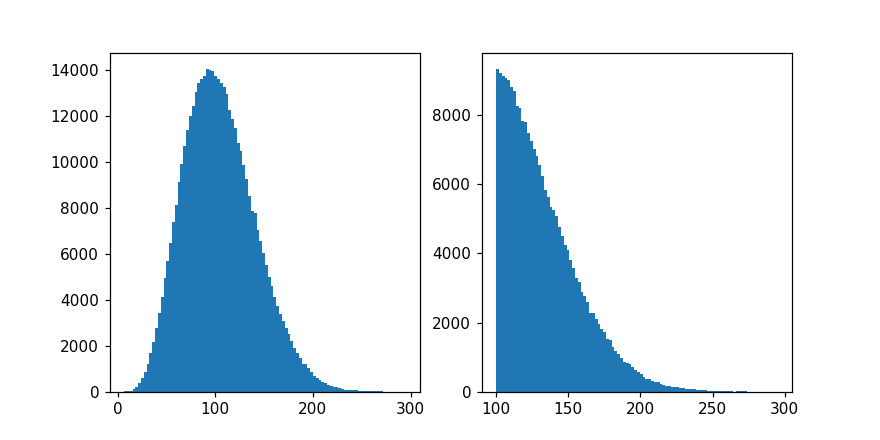

In [7]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(e,bins=100);

plt.subplot(1,2,2)
plt.hist(e[e>100],bins=100);

In [8]:
px = data['jet/px']
py = data['jet/py']
pz = data['jet/pz']

m = np.sqrt(e*e - (px*px + py*py + pz*pz))

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


<IPython.core.display.Javascript object>


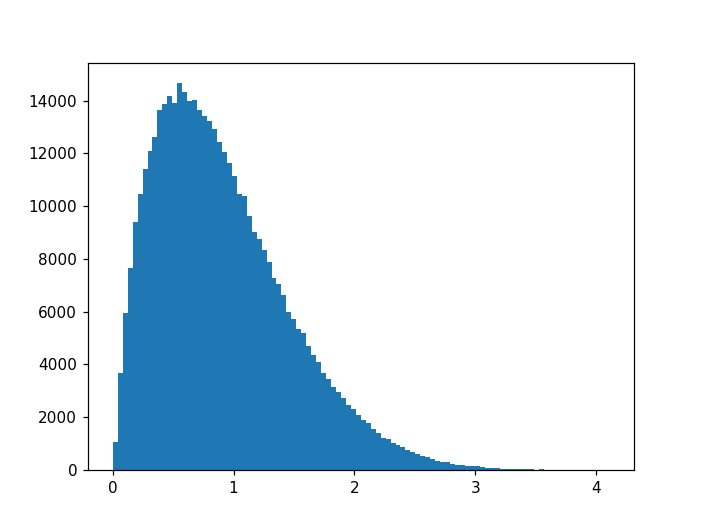

In [9]:
plt.figure()
plt.hist(m[m==m],bins=100);

# Looping over events

In [9]:
################### H5HEP ###########################
print(event)

hp.get_event(event,data,n=10)

print(event)



{'jet/e': None, 'jet/px': None, 'jet/py': None, 'jet/pz': None, 'muons/e': None, 'muons/px': None, 'muons/py': None, 'muons/pz': None}
{'jet/e': array([], dtype=float32), 'jet/px': array([], dtype=float32), 'jet/py': array([], dtype=float32), 'jet/pz': array([], dtype=float32), 'muons/e': array([ 0.87314081], dtype=float32), 'muons/px': array([ 0.79705799], dtype=float32), 'muons/py': array([ 0.62617755], dtype=float32), 'muons/pz': array([ 0.25116357], dtype=float32)}


In [11]:
event['jet/njet']

6

In [12]:
event['jet/e']

array([  96.66043091,  139.04524231,  146.58518982,  132.84169006,
        135.68585205,  154.86392212], dtype=float32)

In [13]:
nevents = len(data['jet/njet'])
print("nevents: ",nevents)

nevents:  100000


In [14]:
hi_pt = []

for i in range(0,nevents):
    
    if (i%10000==0):
        print(i)
    
    ################### H5HEP ###########################
    hp.get_event(event,data,n=i)
    
    if event['jet/njet']>0:
        px = event['jet/px']
        py = event['jet/py']
        
        pt = np.sqrt(px*px + py*py)
        
        hi_pt.append(max(pt))
    
print(len(hi_pt))



    
    

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
89944


<IPython.core.display.Javascript object>


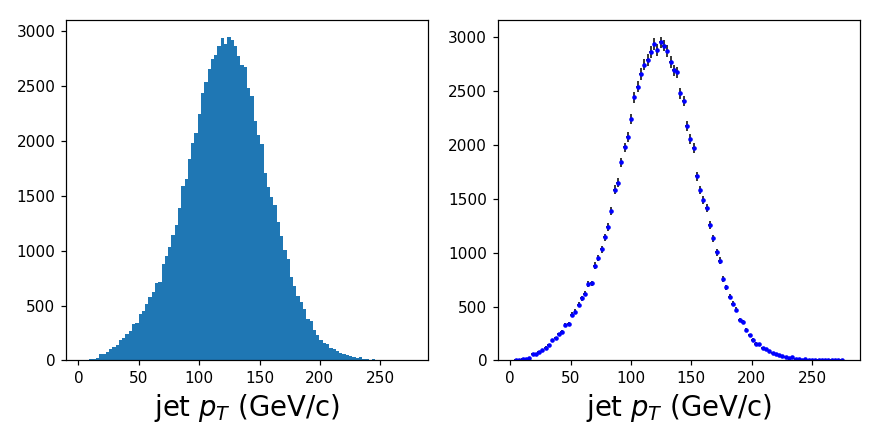

In [15]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(hi_pt,bins=100);
plt.xlabel(r'jet $p_T$ (GeV/c)',fontsize=18)
    
plt.subplot(1,2,2)
lch.hist_err(hi_pt,bins=100);
plt.xlabel(r'jet $p_T$ (GeV/c)',fontsize=18)

plt.tight_layout()